In [1]:
import trf_matrix as trf
import numpy as np
import os
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
plt.style.use("default")
plt.rc("text", usetex=True)
plt.rc('font', family='serif', size=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=17)

In [19]:
def linfunc(x, a, b):
    return a * x + b

# Field Plots

##  30 layers

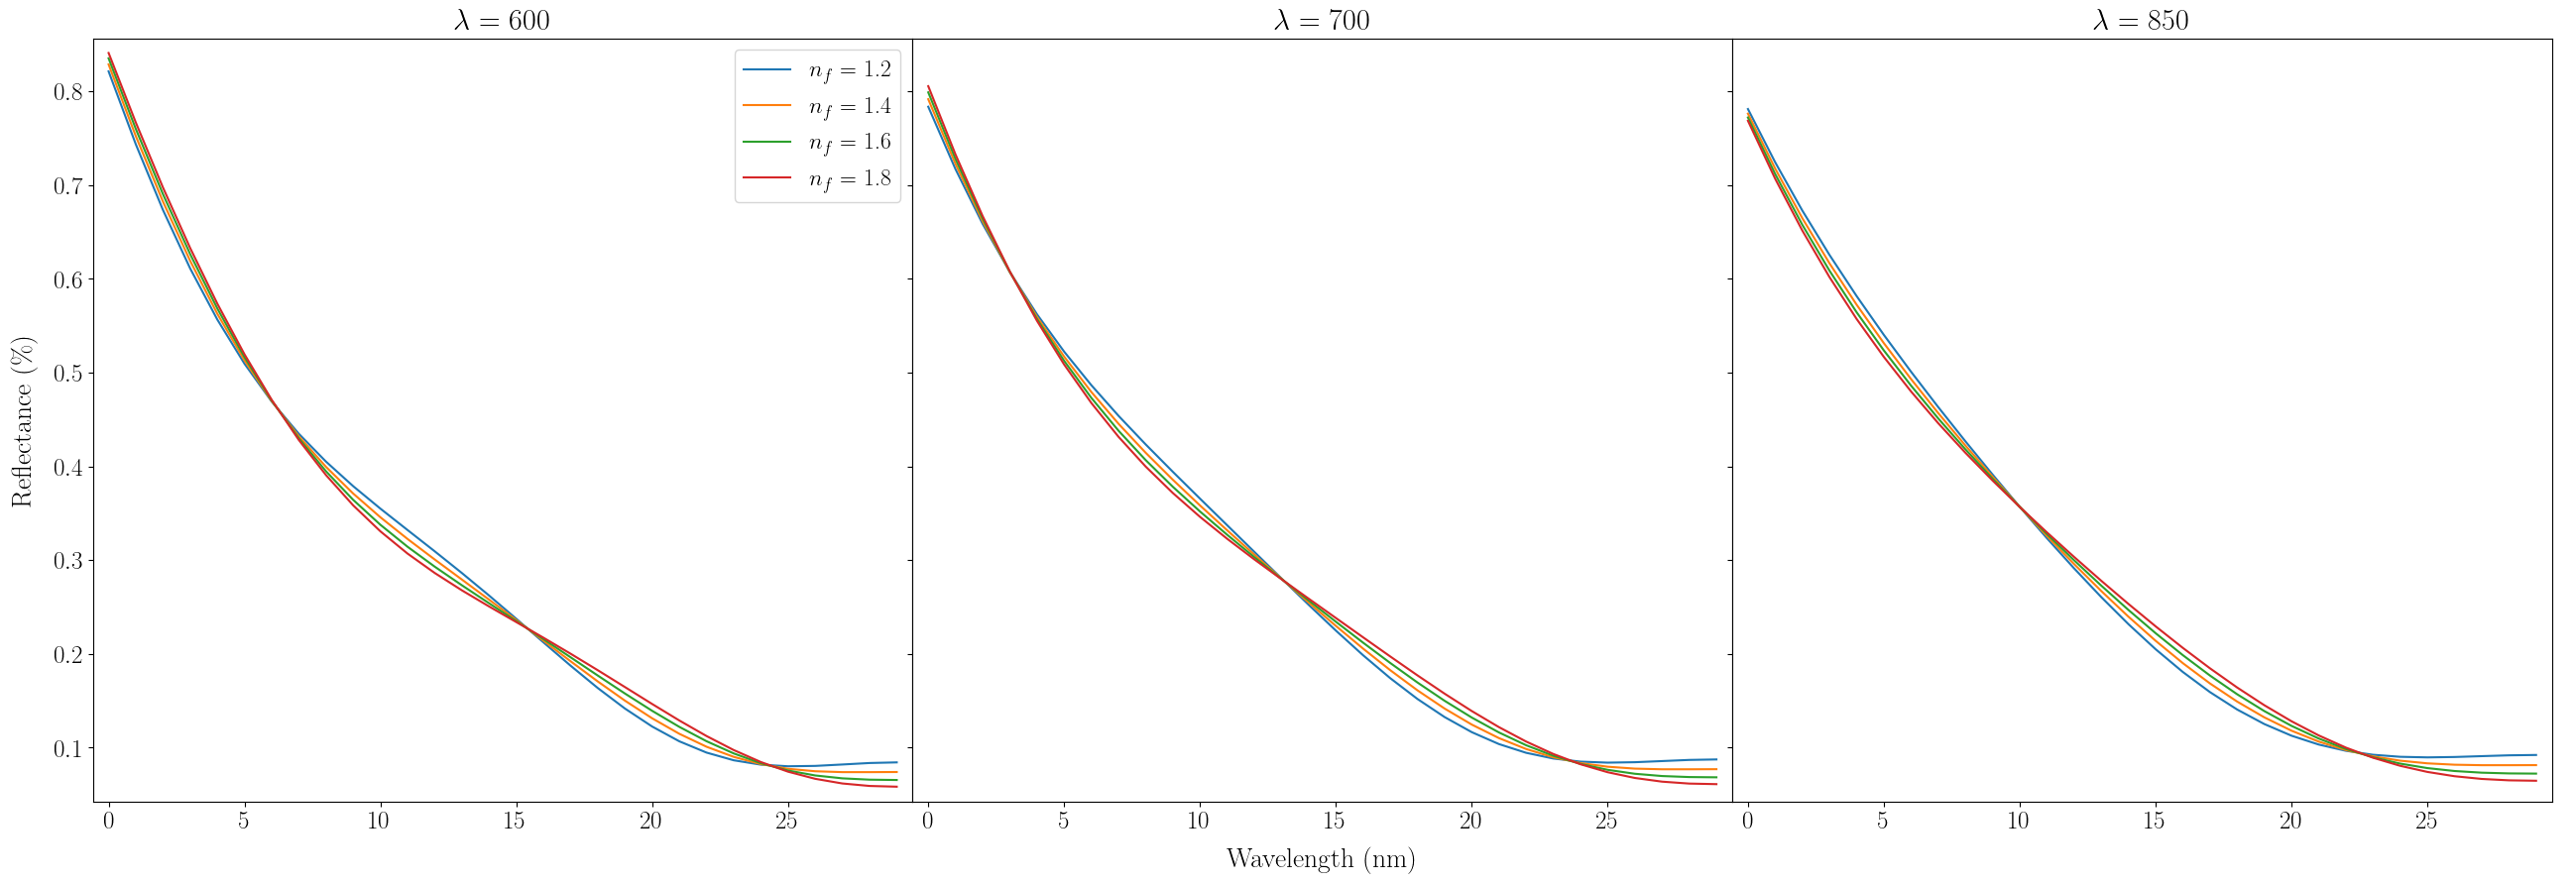

In [25]:
os.chdir("/home/rmp/Projects/TransferMatrix/Field")

n_layers = 30
n_out_list = [1.2, 1.4, 1.6, 1.8]
wls = [600, 700, 850]
ss = [-1, 0, 1]

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, gridspec_kw={'hspace':0.0, 'wspace':0.00},
                             figsize=(32, 10))

for i, (wl, s) in enumerate(zip(wls, ss)):
    for n_out in n_out_list:
        data = np.loadtxt("N{}:ni1.46:np1.6:nf{}:wl{}:s{}.dat".format(n_layers, n_out, wl, s), delimiter="\t")
        x, y = data[:, 0], data[:, 1]
        axs[i].plot(x, y, label=r"$n_f$ = {}".format(n_out))
    axs[i].set_title(r"$\lambda$ = {}".format(wl))
    if i == 0:
        axs[i].legend()
    axs[i].margins(.02)
    
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", top=False, bottom=False, left=False, right=False)
plt.xlabel(r"Wavelength (nm)", labelpad=10, fontsize=20)
plt.ylabel("Reflectance (\%)", labelpad=12, fontsize=20)
os.chdir("/home/rmp/Projects/TransferMatrix/flots")
plt.savefig("field-1.pdf", dpi=800, bbox_inches="tight")
plt.show()

# Foci Plots

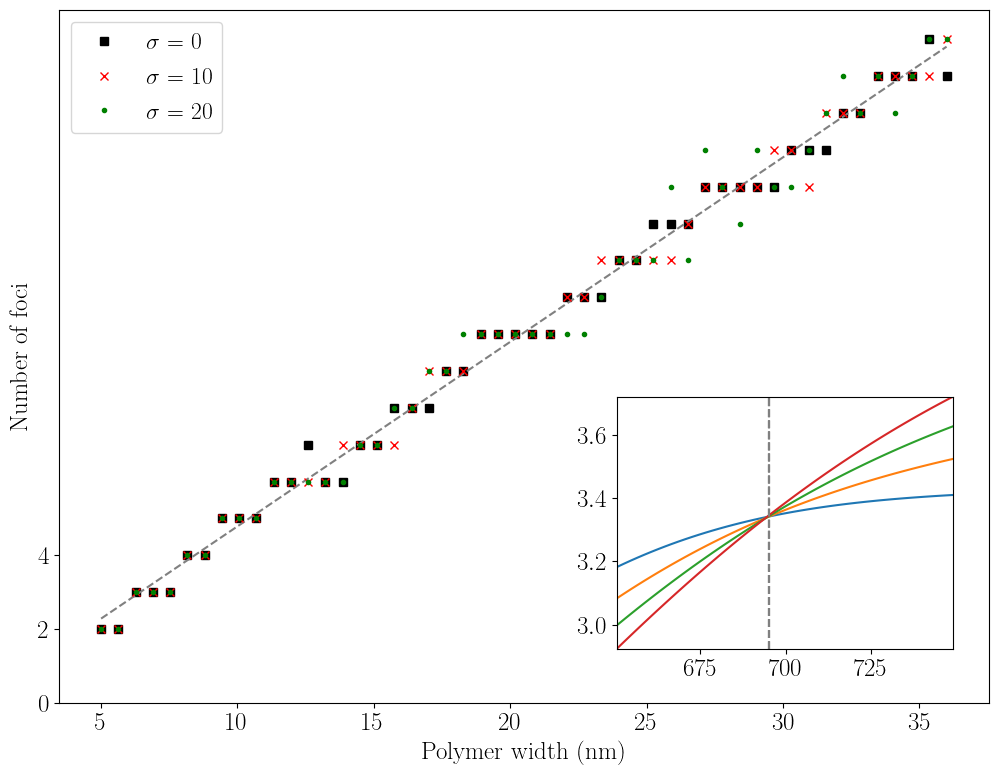

In [26]:
os.chdir("/home/rmp/Projects/TransferMatrix/Foci")

n_layers_list = [20, 25, 30, 35, 40, 45]
n_in_list = [1.46, 1.77]
ws = [0, .1, .2]
n_in = 1.46
n_layers = 30

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, gridspec_kw={'hspace':0.0, 'wspace':0.00}, figsize=(12, 9))
symbs = ("s", "x", ".")
colors = ("black", "red", "green")
for w, symb, color in zip(ws, symbs, colors):
    data = np.loadtxt("N{}:w{}:ni{}:np1.6:wl[300,1400].dat".format(n_layers, w, n_in), delimiter="\t")
    x, y = data[:, 0], data[:, 1]
    if w == 0:
        popt, pcov = opt.curve_fit(linfunc, x, y)
        axs.plot(x, y, symb, color=color, label=r"$\sigma$ = {}%".format(w))
        axs.plot(x, linfunc(x, popt[0], popt[1]), linestyle="--", color="0.5")
    else:
        axs.plot(x, y, symb, color=color, label=r"$\sigma$ = {}%".format(int(w*100)))

    
os.chdir("/home/rmp/Projects/TransferMatrix/Reflectance")
n_out_list = [1.2, 1.4, 1.6, 1.8]
inaxs = fig.add_axes([0.59, 0.17, 0.28, 0.28])
for n_out in n_out_list:
    data = np.loadtxt("N30:ni1.46:np1.60:nf{:.2f}:d10:wl[400,1200].dat".format(n_out), delimiter="\t")
    x, y = data[:, 0], data[:, 1]*100
    xmin, xmax = 650, 750
    x, y = x[(x > xmin) & (x < xmax)], y[(x > xmin) & (x < xmax)]
    inaxs.plot(x, y)
    inaxs.axvline(x = 695, linestyle="--", color="0.5")
    inaxs.set_yticks(ticks=np.arange(3, 3.7, .2))
    inaxs.margins(0)
    
axs.legend()
axs.set_yticks(ticks=np.arange(0, np.max(y)+1, 2))
axs.set_xlabel("Polymer width (nm)")
axs.set_ylabel("Number of foci")
plt.show()